# Heart Disease Problem

In [274]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [231]:
#importing heart disease csv file
df = pd.read_csv('Heart Disease.csv', na_values=["?"])
df.head(15)

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
5,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
6,65,1,4,150.0,236.0,1.0,1,105.0,1.0,0.0,NaN,NaN,NaN,3
7,60,1,3,180.0,0.0,0.0,1,140.0,1.0,1.5,2.0,NaN,NaN,0
8,60,1,3,120.0,0.0,NaN,0,141.0,1.0,2.0,1.0,NaN,NaN,3
9,60,1,2,160.0,267.0,1.0,1,157.0,0.0,0.5,2.0,NaN,NaN,1


# EDA

In [232]:
#Statistics data of dataframe
df.describe()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


In [233]:
#Checking null value
df.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps     56
Chol          7
Fbs           7
Restecg       0
Thalach      53
Exang        53
Oldpeak      56
Slope       102
CA          198
Thal        166
Target        0
dtype: int64

In [234]:
#checking if null values are present in any rows and columns
df[pd.isnull(df).any(axis = 1)]

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [235]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       200 non-null    int64  
 1   Sex       200 non-null    int64  
 2   CP        200 non-null    int64  
 3   Trestbps  144 non-null    float64
 4   Chol      193 non-null    float64
 5   Fbs       193 non-null    float64
 6   Restecg   200 non-null    int64  
 7   Thalach   147 non-null    float64
 8   Exang     147 non-null    float64
 9   Oldpeak   144 non-null    float64
 10  Slope     98 non-null     float64
 11  CA        2 non-null      float64
 12  Thal      34 non-null     float64
 13  Target    200 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


In [236]:
#Seperating Columns based on data type
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Age', 'Sex', 'CP', 'Restecg', 'Target'], dtype='object'),
 dtype('float64'): Index(['Trestbps', 'Chol', 'Fbs', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA',
        'Thal'],
       dtype='object')}

In [237]:
df.columns

Index(['Age', 'Sex', 'CP', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Target'],
      dtype='object')

In [238]:
#Showing unique value in each column
for i in df.columns:
    print("col : ",i,df[i].nunique())

col :  Age 39
col :  Sex 2
col :  CP 4
col :  Trestbps 40
col :  Chol 99
col :  Fbs 2
col :  Restecg 3
col :  Thalach 59
col :  Exang 2
col :  Oldpeak 14
col :  Slope 3
col :  CA 1
col :  Thal 3
col :  Target 5


In [240]:
#filling nan values with mean value for continuous data
continuous_data=['Trestbps','Chol','Thalach','Oldpeak']
for c in continuous_data:
    df[c] = df.fillna(df[c].mean())

In [241]:
#cross check
df.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      0
Chol          0
Fbs           7
Restecg       0
Thalach       0
Exang        53
Oldpeak       0
Slope       102
CA          198
Thal        166
Target        0
dtype: int64

In [243]:
#filling nan values with mean value for categorical data
categorical_data=['Exang','Slope','Fbs']
for c in categorical_data:
    df[c].fillna(df[c].mode()[0], inplace=True)

In [244]:
df.head(15)

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,63,1,4,63.0,63.0,0.0,1,63.0,1.0,63.0,2.0,NaN,NaN,2
1,44,1,4,44.0,44.0,0.0,1,44.0,0.0,44.0,2.0,NaN,NaN,0
2,60,1,4,60.0,60.0,0.0,1,60.0,1.0,60.0,3.0,NaN,NaN,2
3,55,1,4,55.0,55.0,0.0,1,55.0,1.0,55.0,1.0,NaN,NaN,1
4,66,1,3,66.0,66.0,1.0,2,66.0,1.0,66.0,2.0,NaN,NaN,0
5,66,1,3,66.0,66.0,0.0,1,66.0,0.0,66.0,1.0,NaN,NaN,0
6,65,1,4,65.0,65.0,1.0,1,65.0,1.0,65.0,2.0,NaN,NaN,3
7,60,1,3,60.0,60.0,0.0,1,60.0,1.0,60.0,2.0,NaN,NaN,0
8,60,1,3,60.0,60.0,0.0,0,60.0,1.0,60.0,1.0,NaN,NaN,3
9,60,1,2,60.0,60.0,1.0,1,60.0,0.0,60.0,2.0,NaN,NaN,1


In [245]:
df.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      0
Chol          0
Fbs           0
Restecg       0
Thalach       0
Exang         0
Oldpeak       0
Slope         0
CA          198
Thal        166
Target        0
dtype: int64

In [246]:
#removing CA and Thal columns because they have more than 70%  of missing values
df.drop(['CA','Thal'],axis=1,inplace=True)

In [247]:
df.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Target
0,63,1,4,63.0,63.0,0.0,1,63.0,1.0,63.0,2.0,2
1,44,1,4,44.0,44.0,0.0,1,44.0,0.0,44.0,2.0,0
2,60,1,4,60.0,60.0,0.0,1,60.0,1.0,60.0,3.0,2
3,55,1,4,55.0,55.0,0.0,1,55.0,1.0,55.0,1.0,1
4,66,1,3,66.0,66.0,1.0,2,66.0,1.0,66.0,2.0,0


In [248]:
#Replacing 2,3,4 to 1 as they have same output as presence, for absence 0
df['Target'].replace([2,3,4],1,inplace=True)

In [249]:
df.head()

,Age,Sex,CP,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Target
0,63,1,4,63.0,63.0,0.0,1,63.0,1.0,63.0,2.0,1
1,44,1,4,44.0,44.0,0.0,1,44.0,0.0,44.0,2.0,0
2,60,1,4,60.0,60.0,0.0,1,60.0,1.0,60.0,3.0,1
3,55,1,4,55.0,55.0,0.0,1,55.0,1.0,55.0,1.0,1
4,66,1,3,66.0,66.0,1.0,2,66.0,1.0,66.0,2.0,0


# Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002226A8889A0>,
      dtype=object)

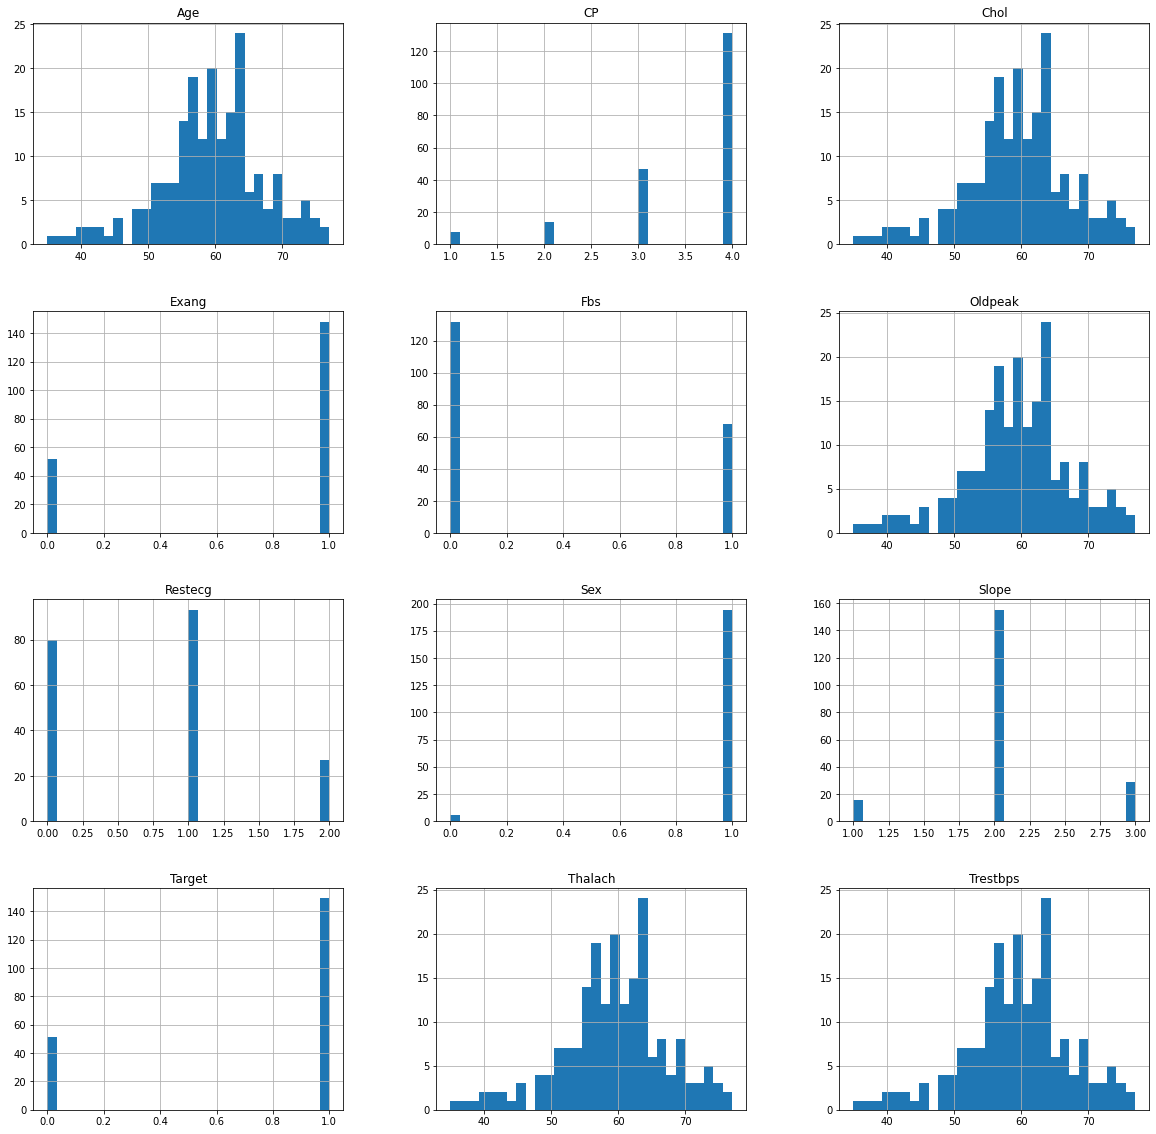

In [250]:
#Using histogram to check normal distribution
df.hist(figsize=(20,20),grid=True,bins=30)

From the above visualization shows that some columns have normal distribution.
CP, Fbs, Exang, Restecg, slope are discrete values.

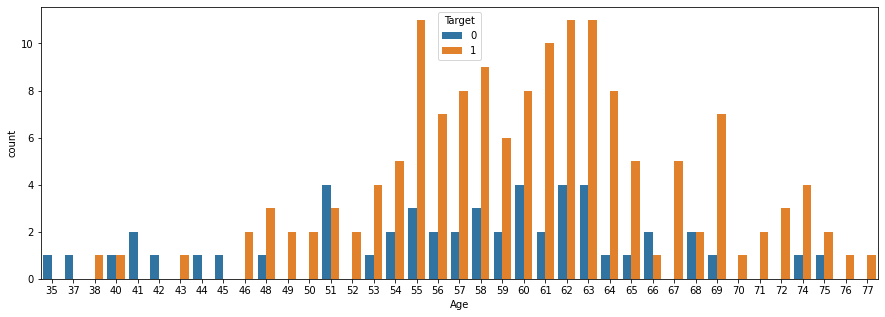

In [251]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age',hue='Target',data=df)

Above visualization shows that age 55, 62, 63 people have maximum number of heart disease.

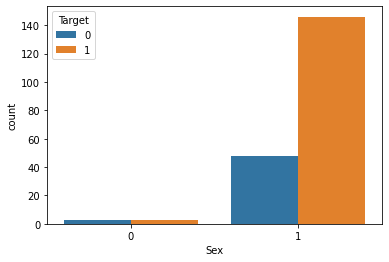

In [252]:
sns.countplot(x='Sex',hue='Target',data=df)

Above visualization show male has maximum number of heart disease

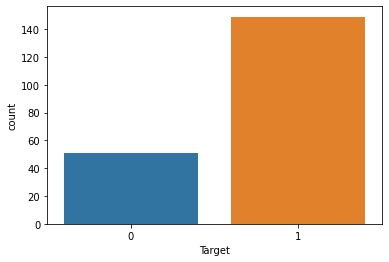

In [253]:
sns.countplot(x='Target',data=df)

Above visualization shows the count of absence and presence of heart disease.

In [254]:
df['Target'].value_counts()

1    149
0     51
Name: Target, dtype: int64

In [255]:
#percentage cross check
(149-51)/149*100

65.77181208053692

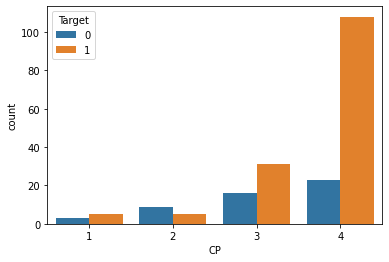

In [256]:
sns.countplot(x='CP',hue='Target',data=df)

Above visualization shows category 4 have maximum number of absence of heart disease.
As category increases number of absence and presence of heart disease increases.

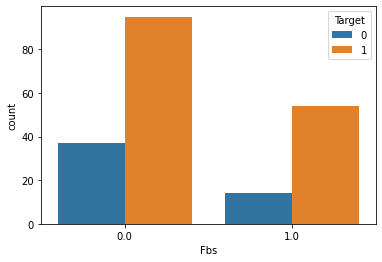

In [257]:
sns.countplot(x='Fbs',hue='Target',data=df)

Above visualization shows category 0 have maximum number of absence of heart disease.

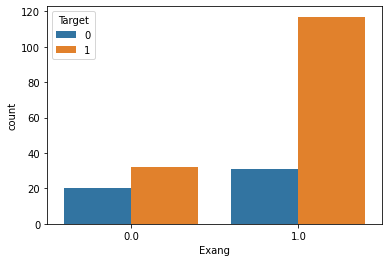

In [258]:
sns.countplot(x='Exang',hue='Target',data=df)

Above visualization shows category 0 have maximum number of absence of heart disease.

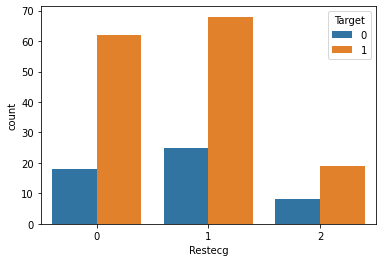

In [259]:
sns.countplot(x='Restecg',hue='Target',data=df)

Above visualization shows category 1 have maximum number of absence of heart disease.

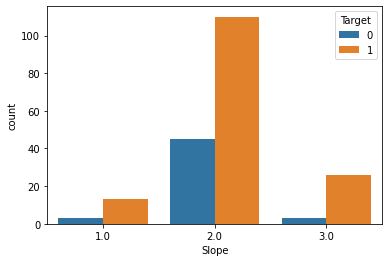

In [260]:
sns.countplot(x='Slope',hue='Target',data=df)

Above visualization shows slope 2 has maximum number of absence of heart disease.

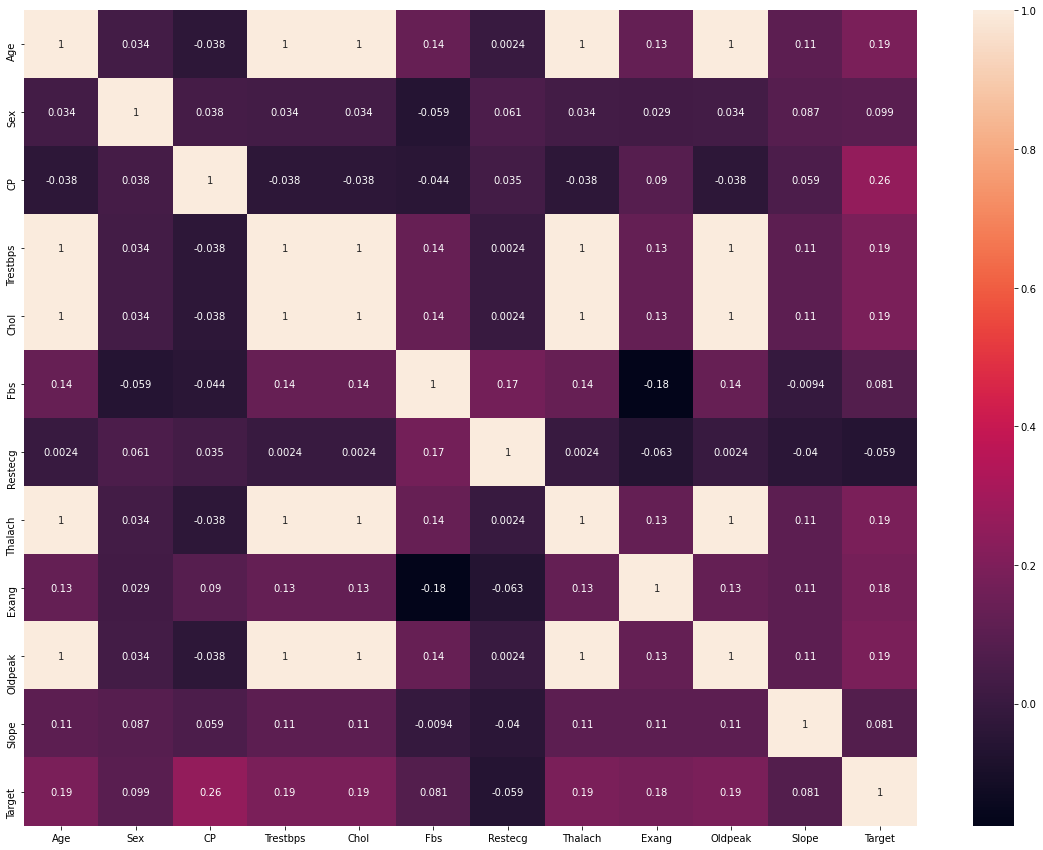

In [261]:
#correlation
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

Above visualization shows chest pain has maximum positive correlated value, Restecg has negatively correlated.

# Outliers

Age            AxesSubplot(0.125,0.749828;0.227941x0.130172)
Sex         AxesSubplot(0.398529,0.749828;0.227941x0.130172)
CP          AxesSubplot(0.672059,0.749828;0.227941x0.130172)
Trestbps       AxesSubplot(0.125,0.593621;0.227941x0.130172)
Chol        AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Fbs         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Restecg        AxesSubplot(0.125,0.437414;0.227941x0.130172)
Thalach     AxesSubplot(0.398529,0.437414;0.227941x0.130172)
Exang       AxesSubplot(0.672059,0.437414;0.227941x0.130172)
Oldpeak        AxesSubplot(0.125,0.281207;0.227941x0.130172)
Slope       AxesSubplot(0.398529,0.281207;0.227941x0.130172)
Target      AxesSubplot(0.672059,0.281207;0.227941x0.130172)
dtype: object

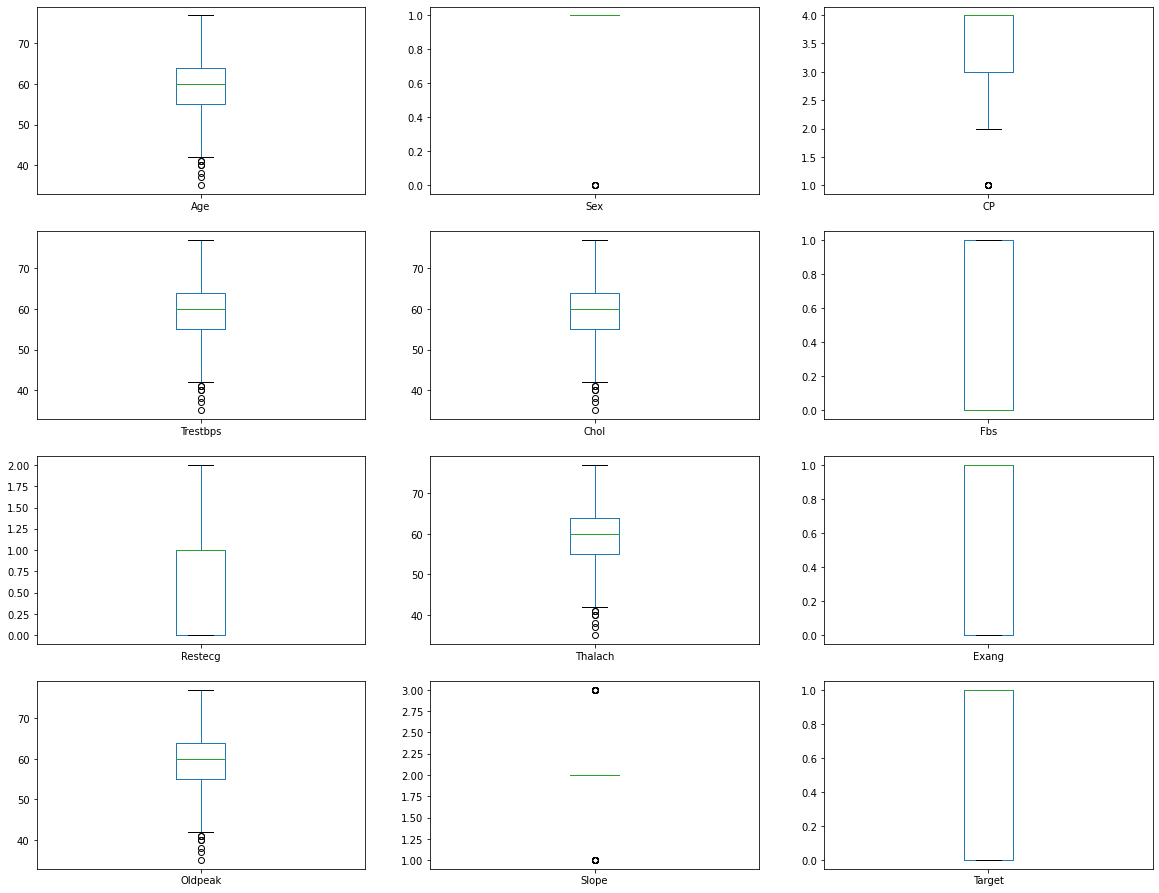

In [262]:
#Using boxplot to check outliers
df.plot(figsize=(20,20), kind='box', subplots=True, layout=(5,3))

Above visualisation shows Age, Thalach, Oldpeak, Chol, Trestbps have outliers.

In [263]:
#Remove skewness using log method
skew_data=('CP','Fbs', 'Exang')
for col in skew_data :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [264]:
df.skew()

Age        -0.404091
Sex        -5.552105
CP         -1.648734
Trestbps   -0.404091
Chol       -0.404091
Fbs         0.680636
Restecg     0.391463
Thalach    -0.404091
Exang      -1.102593
Oldpeak    -0.404091
Slope       0.210521
Target     -1.132724
dtype: float64

# Scaling

In [265]:
#Assigning input and target data
X=df.drop(['Target'],axis=1)
Y=df[['Target']]

In [266]:
#Using Standard Scaler for scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ScaledX=sc.fit_transform(X)

# Models

In [267]:
#importing important librarires for models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, train_test_split

In [271]:
#Finding best model and random state

best_rstate_clas=0
best_accu_rate=0
models=[RandomForestClassifier(), LogisticRegression(), AdaBoostClassifier(), 
       GradientBoostingClassifier(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]
for r in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(ScaledX,Y,test_size=0.33,random_state=r)
    for model in models:
        model.fit(x_train,y_train.values.ravel())
        pred_test=model.predict(x_test)
        pred_train=model.predict(x_train)
        accu_score=accuracy_score(y_test,pred_test)
        if accu_score>best_accu_rate:
            best_accu_rate=accu_score
            best_rstate_clas=r
            best_model=model
            print(f"best accuracy : {best_accu_rate*100} found on the random state {best_rstate_clas}, best model is {best_model}")
print(f"--------------best accuracy : {best_accu_rate*100} found on the random state {best_rstate_clas}, best model is {best_model}-----------------")

best accuracy : 66.66666666666666 found on the random state 1, best model is RandomForestClassifier()
best accuracy : 71.21212121212122 found on the random state 1, best model is LogisticRegression()
best accuracy : 72.72727272727273 found on the random state 1, best model is KNeighborsClassifier()
best accuracy : 77.27272727272727 found on the random state 2, best model is LogisticRegression()
best accuracy : 78.78787878787878 found on the random state 3, best model is AdaBoostClassifier()
best accuracy : 83.33333333333334 found on the random state 5, best model is LogisticRegression()
best accuracy : 87.87878787878788 found on the random state 5, best model is SVC()
best accuracy : 87.87878787878788 found on the random state 5, best model is SVC()


# Hyperparameter Tuning

In [275]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test=train_test_split(ScaledX,Y,test_size=0.33,random_state=5)

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
GridSearch_SVC= GridSearchCV(SVC(), param_grid, refit = True, n_jobs=-1) 
GridSearch_SVC.fit(x_train,y_train)
pred_LR=GridSearch_SVC.predict(x_test)
SVC_best_parm=GridSearch_SVC.best_params_
print("Best Param ",GridSearch_SVC.best_params_)
print("Best estimator ",GridSearch_SVC.best_estimator_)
print("Best score ",GridSearch_SVC.best_score_)

Best Param  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator  SVC(C=1, gamma=0.1)
Best score  0.7162393162393161


Best Parameter is   {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [277]:
#Finding Cross validation score and accuracy score
SV=SVC(C=1, gamma=0.1)
SV.fit(x_train,y_train)
pred_SV=SV.predict(x_test)
lss=accuracy_score(y_test,pred_SV)
for j in range(2,20):
    lssscore=cross_val_score(SV,ScaledX,Y,cv=j)
    lsc=lssscore.mean()
    print("At CV : ",j)
    print("cross validation score is :",lsc*100)
    print("accuracy_score is :",lss*100)
    print('\n')


At CV :  2
cross validation score is : 75.0
accuracy_score is : 87.87878787878788


At CV :  3
cross validation score is : 75.50881953867027
accuracy_score is : 87.87878787878788


At CV :  4
cross validation score is : 76.50000000000001
accuracy_score is : 87.87878787878788


At CV :  5
cross validation score is : 76.0
accuracy_score is : 87.87878787878788


At CV :  6
cross validation score is : 76.50029708853239
accuracy_score is : 87.87878787878788


At CV :  7
cross validation score is : 76.00281491907107
accuracy_score is : 87.87878787878788


At CV :  8
cross validation score is : 76.5
accuracy_score is : 87.87878787878788


At CV :  9
cross validation score is : 75.47211242863416
accuracy_score is : 87.87878787878788


At CV :  10
cross validation score is : 75.5
accuracy_score is : 87.87878787878788


At CV :  11
cross validation score is : 77.00691121743752
accuracy_score is : 87.87878787878788


At CV :  12
cross validation score is : 75.4595588235294
accuracy_score is : 87.

In [278]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_SV))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.92      0.95      0.93        57

    accuracy                           0.88        66
   macro avg       0.74      0.70      0.72        66
weighted avg       0.87      0.88      0.87        66



In [281]:
#Best Cross Validation Score and Accuracy Score
lssscore_selected=cross_val_score(SV,ScaledX,Y,cv=11).mean()
print("The CV score is",lssscore_selected*100," \nThe accuracy score is",lss*100)

The CV score is 77.00691121743752  
The accuracy score is 87.87878787878788


# ROC Curve

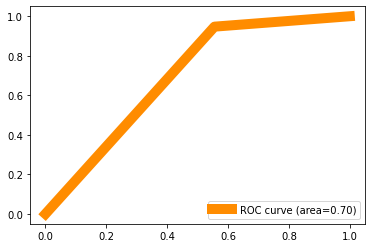

In [282]:
#Finding roc curve 
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_test, pred_SV)
roc_auc=auc(fpr,tpr)
plt.figure
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%0.2f)'%roc_auc)
plt.legend(loc="lower right")
plt.show()

ROC Curve score is 70%.

# Saving Model

In [285]:
#save the model 
import pickle
filename='Heart.pkl'
pickle.dump(SV,open(filename,'wb'))

# Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. 
After importing the data, I did EDA process and removed unwanted data.
I analysed data using plots. 
Removed outliers using log method and Scaled data using Standard Scaler. 
Used Machine Learning algorithms, RandomForestClassifier, LogisticRegression, AdaBoostClassifier, 
GradientBoostingClassifier, DecisionTreeClassifier, SVC, KNeighborsClassifier. 
Support Vector Classifier is the best model and scores are:
    
CV Score is 77.00691121743752,
 Accuracy Score is 87.87878787878788,
 ROC Curve Score is 70.
